In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Processing Effective-One-Body Inspiral Waveforms for Merger-Ringdown

## Introduction

In order to generate full waveforms for binary black hole mergers, one requires accurate modelling of the inspiral and merger-ringdown phases of the merger. For the inspiral phase, the Effective-One-Body(EOB) formalism provides fast and accurate waveforms. However, in order to use the BOB formalism to model the merger ringdown, the inspiral datatset needs to be processed to obtain additional information that are need as input.

We discuss here the nature of the inspiral dataset and document how to obtain the relevant quantities in order to generate the full waveform.

## The Dataset

The inspiral dataset provides the following information:

1. Time , $t$
2. $\mathfrak{Re}(h_{22})$
3. $\mathfrak{Im}(h_{22})$
4. $|h_{22}|$
5. Phase, $\Phi$

We read in this data here. We also declare the output array which should have, as intended:

1.   Time, $t$
2.   $\mathfrak{Re}(h_{22})$
3.   $\mathfrak{Im}(h_{22})$
4.   $|h_{22}|$
5.   Phase , $\Phi$
6.   Orbital Frequency, $\omega$
7.   Frequency Derivative, $\dot{\omega}$

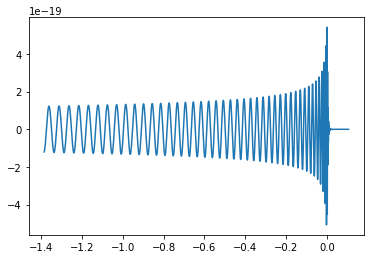

In [2]:
IN_TIME , IN_HR , IN_HI , IN_HMAG , IN_PHI = 0 , 1 , 2 , 3 , 4
OUT_TIME , OUT_HR , OUT_HI , OUT_HMAG , OUT_PHI , OUT_OM , OUT_OMDOT = 0 , 1 , 2 , 3 , 4 , 5 , 6

inspiral_waveform_in = np.loadtxt("23_m_sol_no_spin.dat")
plt.plot(inspiral_waveform_in[:,IN_TIME],inspiral_waveform_in[:,IN_HR])

inspiral_waveform_out = np.zeros([len(inspiral_waveform_in),7])
inspiral_waveform_out[:,:OUT_PHI+1] = inspiral_waveform_in[:,:]

## Computing the Frequency and its derivative

We can obtain the frequency from the phase information by relating

$$
\omega = \frac{d\Phi}{dt}
$$

To do this, we use finite difference derivatives to compute the frequency and its derivative:

$$
[\omega]_{i} =  \frac{\Phi_{i+1} -  \Phi_{i-1}}{2\Delta t} \\
[\dot{\omega}]_{i} = \frac{\Phi_{i+1} + \Phi_{i-1} - 2\Phi_{i}}{\left(\Delta t\right)^2} \\
$$

As part of the implementation, we choose the first and last data points as "ghost zones".

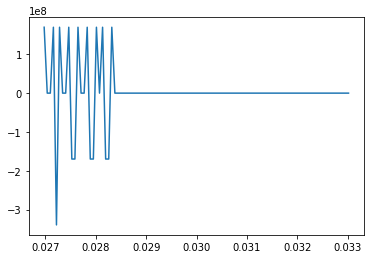

In [10]:
dt = inspiral_waveform_in[1,IN_TIME] - inspiral_waveform_in[0,IN_TIME]

for i in range(1,len(inspiral_waveform_in)-1):
    inspiral_waveform_out[i,OUT_OM] = (inspiral_waveform_in[i+1,IN_PHI] - inspiral_waveform_in[i-1,IN_PHI])/(2*dt)
    inspiral_waveform_out[i,OUT_OMDOT] = (inspiral_waveform_in[i+1,IN_PHI] + inspiral_waveform_in[i-1,IN_PHI] - 2*inspiral_waveform_in[i,IN_PHI])/(dt*dt)
    
plt.plot(inspiral_waveform_out[-1300:-1200,OUT_TIME],inspiral_waveform_out[-1300:-1200,OUT_OMDOT])